<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/predictiveModeling/code/logistic_regression_lda_holiday_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#os.chdir('/content/hogwarts/academia/predictiveModeling/data'); os.getcwd()

In [3]:
rd = pd.read_csv('../data/Holiday_Package.csv'); rd.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [4]:
#create a copy of dataframe
df = rd.copy(); df.head(1)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no


In [5]:
#drop the unnamed column
df.drop('Unnamed: 0', axis =1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


1. There are no nulls in the data as observed from info results
2. Except for Holliday_Package and foreign, all the features are int which is as per expectations

In [7]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [8]:
df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

1. Except education, all the features are skewed and don't seemed to be normally ditributed

In [9]:
df['Holliday_Package'] = df['Holliday_Package'].map({'no':0,'yes':1})
df['Holliday_Package'] = df['Holliday_Package'].astype(int)

In [10]:
df['foreign'] = df['foreign'].map({'no':0,'yes':1})
df['foreign'] = df['foreign'].astype(int)

In [11]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

Normality test for Salary
Statitics = 0.749, p value = 0.000


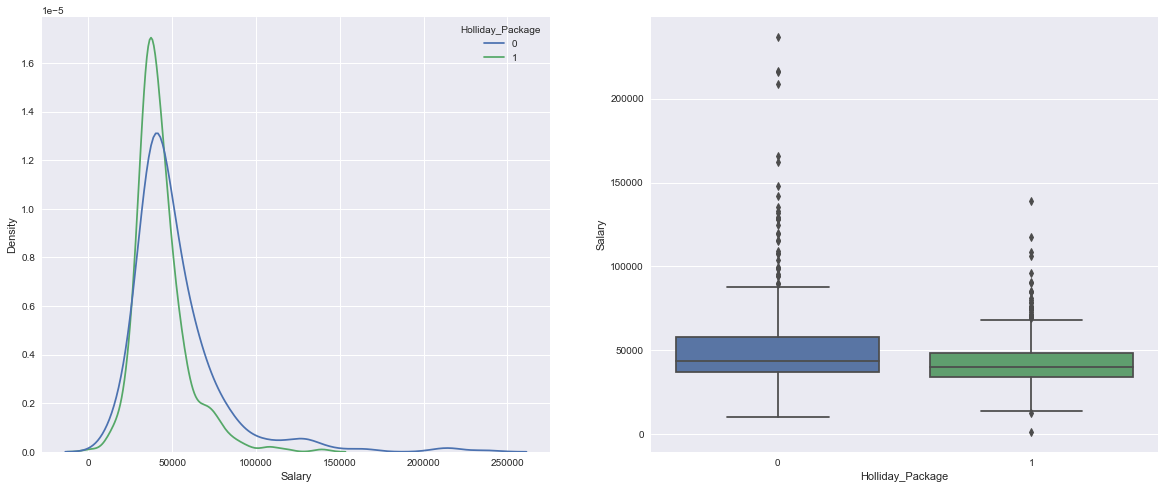

Salary is not normally distributed.

Normality test for age
Statitics = 0.975, p value = 0.000


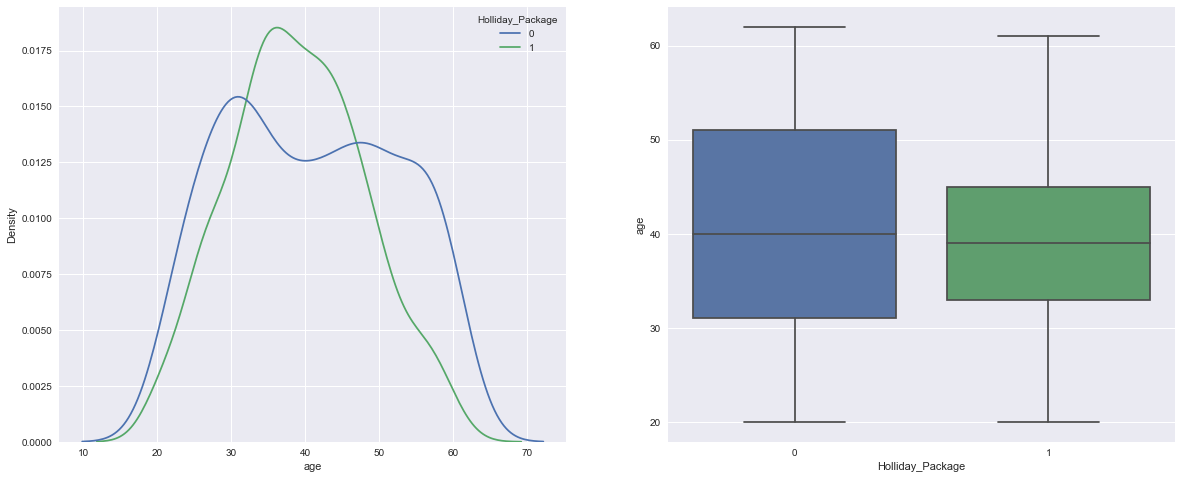

age is not normally distributed.

Normality test for educ
Statitics = 0.976, p value = 0.000


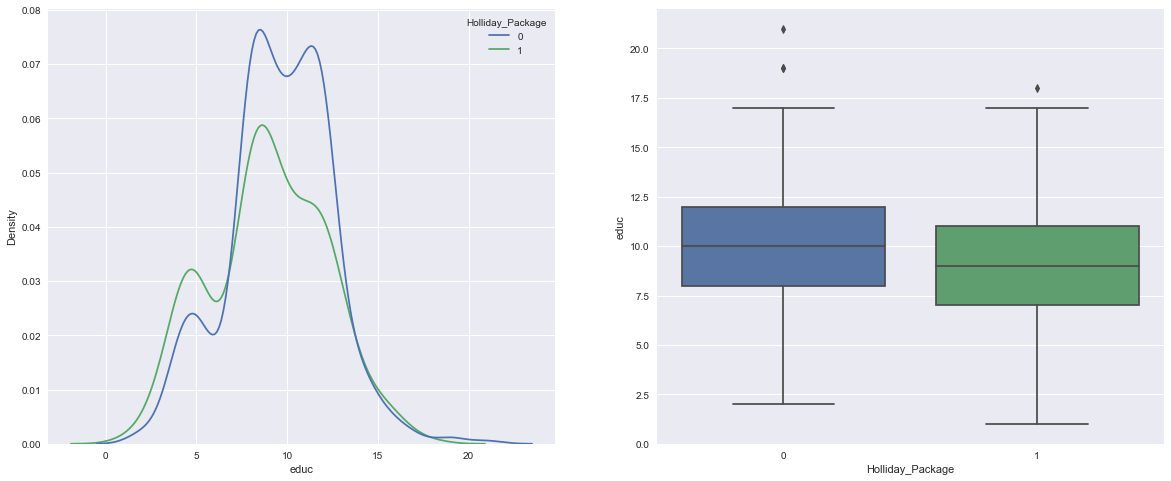

educ is not normally distributed.

Normality test for no_young_children
Statitics = 0.559, p value = 0.000


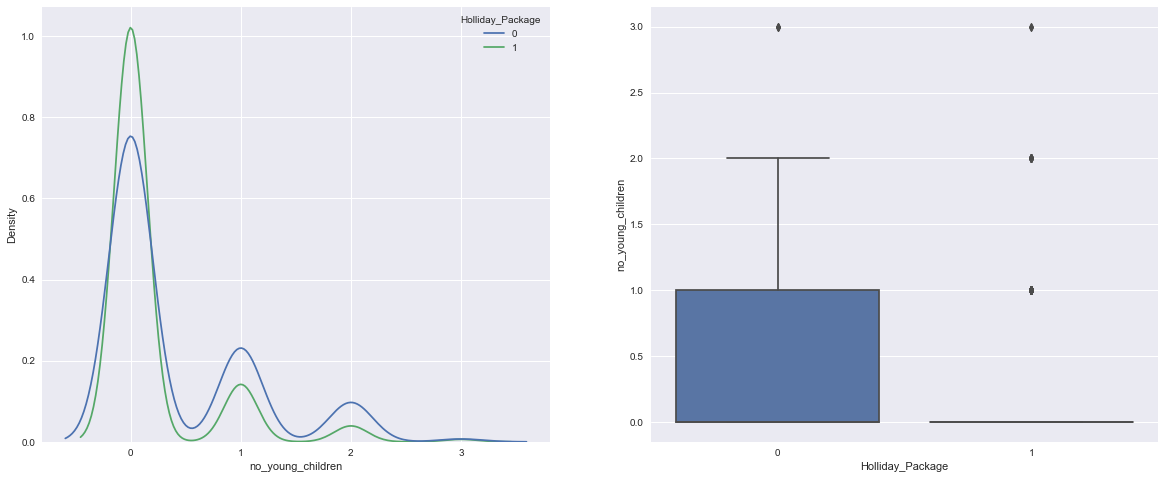

no_young_children is not normally distributed.

Normality test for no_older_children
Statitics = 0.812, p value = 0.000


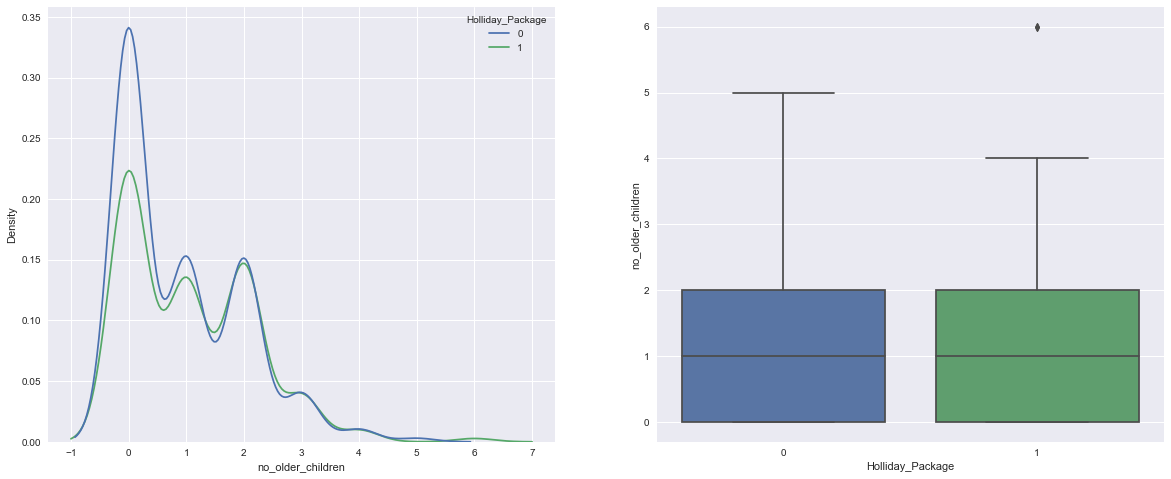

no_older_children is not normally distributed.



In [12]:
from scipy.stats import shapiro as shapiro

for feature in ['Salary', 'age', 'educ', 'no_young_children','no_older_children']:
    stats, p_val = shapiro(df[feature])
    print('Normality test for', feature)
    print('Statitics = %.3f, p value = %.3f' % (stats, p_val))
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    sns.kdeplot(ax=axes[0], data=df, x=feature,hue='Holliday_Package')
    sns.boxplot(ax=axes[1], data=df, y=feature, x='Holliday_Package')
    plt.show()
    if p_val > 0.05: print(feature, 'is normally distribution and has Gaussian curve.\n')
    else: print(feature, 'is not normally distributed.\n')

In [13]:
dups = df.duplicated()
df[dups]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


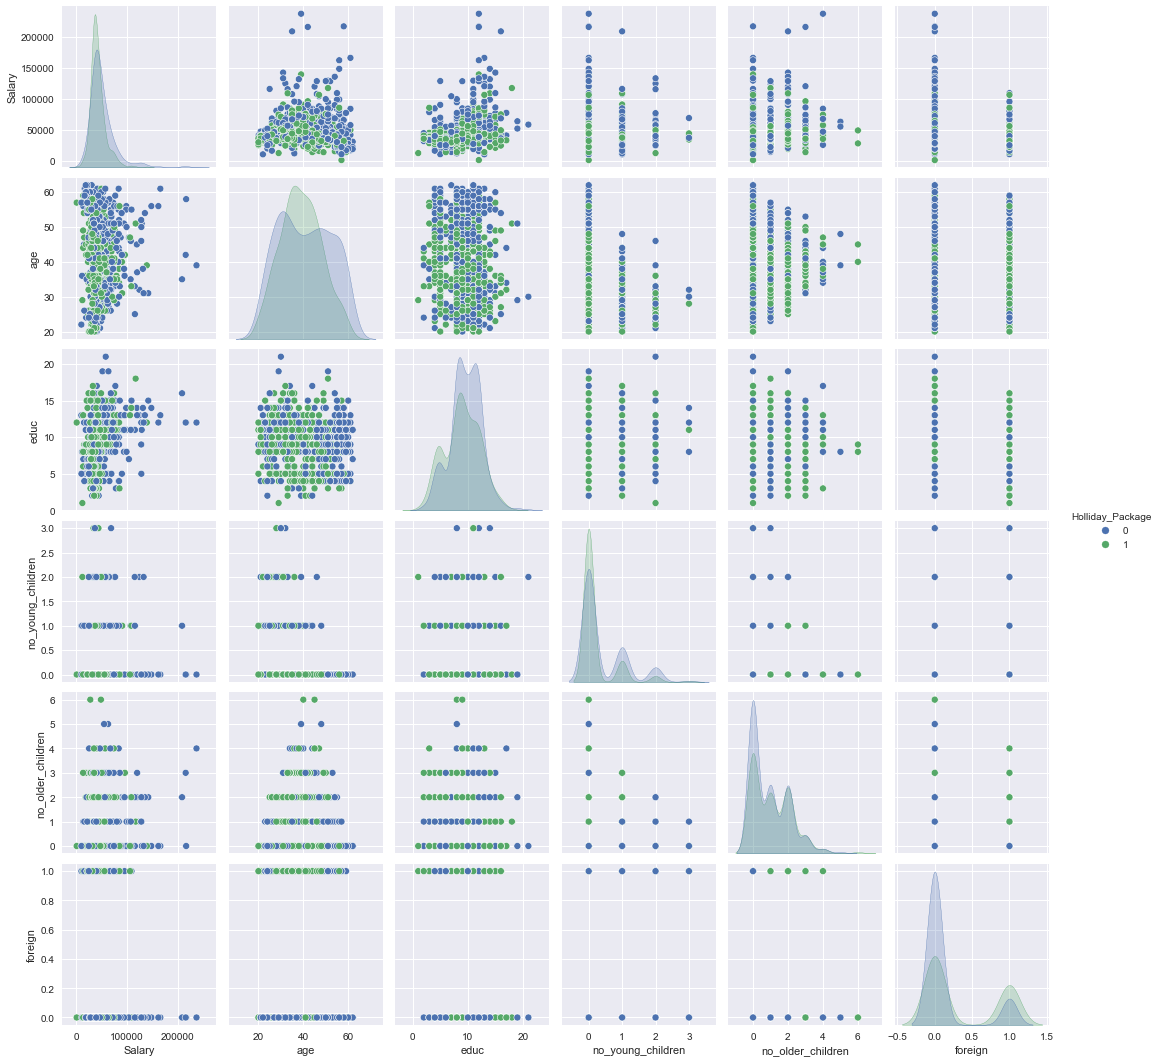

In [14]:
sns.pairplot(data = df, diag_kind='kde',hue='Holliday_Package'); plt.show()

In [15]:
df_con = df[['Salary','age','educ']]

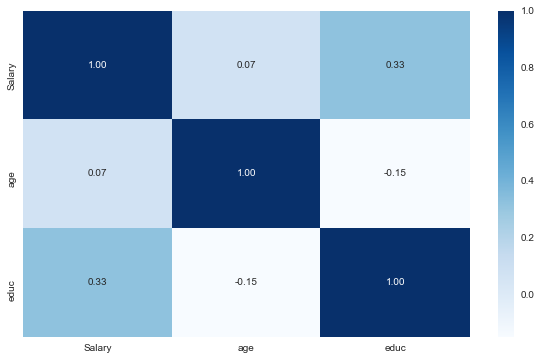

In [16]:
fig = plt.subplots(figsize=(10, 6))

corr = df_con.corr(method='pearson')
sns.heatmap(df_con.corr(), annot=True,fmt='.2f',cmap='Blues'); plt.show()

1. There are only 3 continous variables and they don't seem to have any correlation among themselves

In [17]:
df_lg = df.copy()

In [18]:
X = df_lg.drop('Holliday_Package', axis=1, inplace=False)
y = df_lg.pop('Holliday_Package')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

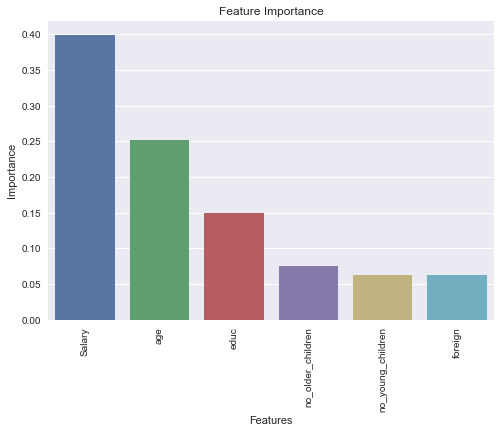

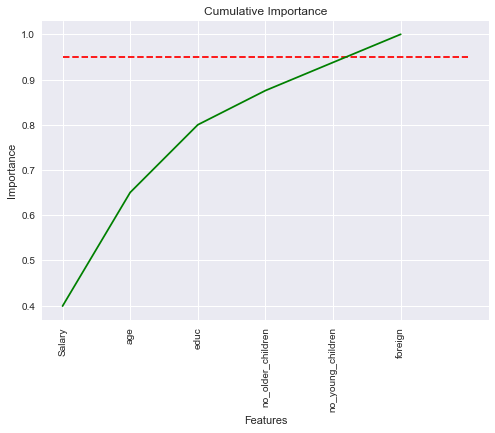

In [20]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [21]:
lgrg_model = LogisticRegression()
lgrg_model.fit(X_train,y_train)
lgrg_model

LogisticRegression()

In [22]:
lgrg_model.intercept_

array([0.00031316])

In [23]:
col_1 = list()
col_2 = list()

for idx, col_name in enumerate(X_train.columns):
    col_1.append(col_name)
    col_2.append(lgrg_model.coef_[0][idx])

df_coef = pd.DataFrame.from_dict({'feature':col_1,'coef':col_2})

df_coef

,feature,coef
0,Salary,-0.000010
1,age,0.005682
2,educ,0.001916
3,no_young_children,-0.000597
4,no_older_children,0.000882
5,foreign,0.000733


In [24]:
lgrg_model.coef_[0][2]

0.0019161000294605462

In [25]:
ytrain_predict = lgrg_model.predict(X_train)
ytest_predict = lgrg_model.predict(X_test)

In [26]:
#Train data Confusion Matrix
print('Logistic Regression stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (lgrg_model.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Logistic Regression stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (lgrg_model.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Logistic Regression stats on train data:
[[294  32]
 [261  23]]
Accuracy score : 52.0 percent
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



Logistic Regression stats on test data:
[[129  16]
 [107  10]]
Accuracy score : 53.1 percent
              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



Area under ROC : 56.7 percent
Best Threshold=0.454757, G-Mean=0.572


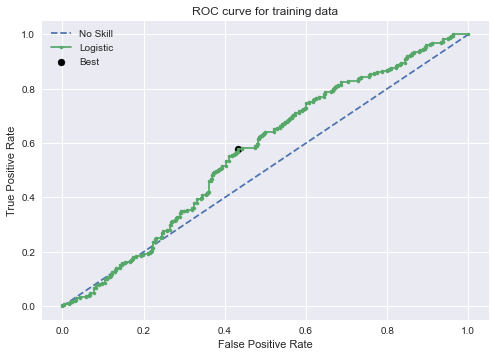

In [27]:
train_prob = lgrg_model.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 62.7 percent
Best Threshold=0.458299, G-Mean=0.619


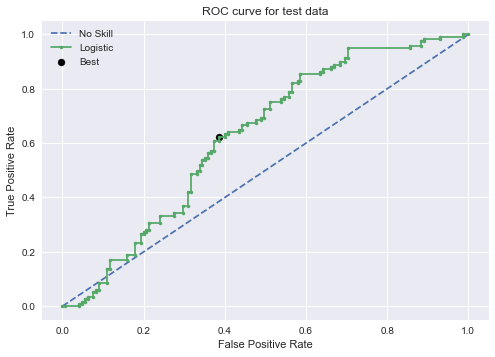

In [28]:
test_prob = lgrg_model.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

In [40]:
df2 = df.copy()

In [41]:
df2.describe()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.459862,47729.172018,39.955275,9.307339,0.311927,0.982798,0.247706
std,0.498672,23418.668531,10.551675,3.036259,0.612870,1.086786,0.431928
min,0.000000,1322.000000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000
75%,1.000000,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000
max,1.000000,236961.000000,62.000000,21.000000,3.000000,6.000000,1.000000


In [42]:
df2['no_young_children'] = np.where(df2['no_young_children']>0,1,df['no_young_children'])

In [43]:
df2['no_older_children'] = np.where(df2['no_older_children']>0,1,df['no_older_children'])

In [44]:
df2

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,1,0,0
4,0,66734,44,12,0,1,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,1,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,1,0,1
870,1,55958,41,10,0,1,1


In [51]:
df2_highschool = df2[(df2['educ']<=12)]
df2_highschool['educ'].unique()

array([ 8,  9, 11, 12, 10,  4,  7,  6,  5,  2,  3,  1], dtype=int64)

In [56]:
df2[df2[(df2['educ']>12)]['educ']<=16]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).